In [121]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colorbar import ColorbarBase
import matplotlib.lines as mlines
import squarify
import pandas as pd
import numpy as np

In [122]:
country_level =  pd.read_csv("../data/final/iff_risk_reportingcountry_long.csv")
nigeria = pd.read_csv("../output/tables/nigeria.csv")
brazil= pd.read_csv("../output/tables/brazil.csv")
indonesia = pd.read_csv("../output/tables/indonesia.csv")
path_figures = "../output/figures"

#### Define colors of figures

Colors representing vulnerability values

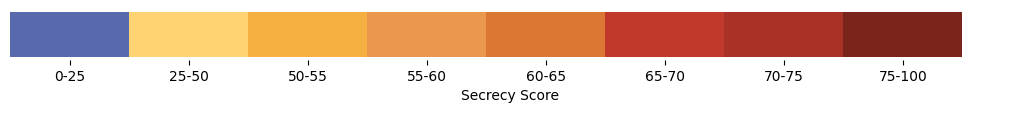

In [123]:
# Define the score ranges and corresponding colors with labels
color_map = [(0, 25, '#586AAD', '0-25'), (25, 50, '#FFD371', '25-50'), (50, 55, '#f5b041', '50-55'),
             (55, 60, '#eb984e', '55-60'), (60, 65, '#dc7633', '60-65'), (65, 70, '#c0392b', '65-70'),
             (70, 75, '#a93226', '70-75'), (75, 100, '#7b241c', '75-100')]

# Create a figure and axis with adjusted figsize
fig, ax = plt.subplots(figsize=(10, 0.5))  # Adjust the figsize as needed

# Calculate the width of each color bar
bar_width = 100 / len(color_map)

# Create horizontal bars for each score range with the specified color and width
for i, (start, end, color, label) in enumerate(color_map):
    ax.barh(0, bar_width, left=i * bar_width, color=color, height=1)

# Set the x-axis tick positions and labels
tick_positions = [i * bar_width + bar_width / 2 for i in range(len(color_map))]
ax.set_xticks(tick_positions)
ax.set_xticklabels([label for (_, _, _, label) in color_map])

# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])

# Remove the frame around the graph
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Adjust subplots to remove white space within borders
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Display the color bar with labels
plt.xlabel("Secrecy Score")
plt.show()


Colors of channels

In [124]:
channel_colors = ['#3b545c', '#618b97', '#684641', '#be8177', '#FFD371', '#fff382']

### IFF Risks in different economic channels

In [125]:
def plot_vulnerability_chart(ax, country, year, channels_to_keep):
    # Create a DataFrame with the desired channel order
    ordered_channels_df = pd.DataFrame({'channel': channels_to_keep})
    
    # Get the data for the specified country and year, filtered by the channels to keep
    country_year = country_level[(country_level['iso3'] == country) & (country_level['year'] == year)]
    country_year = country_year[country_year['channel'].isin(channels_to_keep)]
    
    # Merge to align with the desired channel order
    merged_data = pd.merge(ordered_channels_df, country_year, on='channel', how='left')
    
    # Extract the relevant data for plotting
    channels = merged_data['channel']
    vulnerability = merged_data['vulnerability']
    vulnerability_reg = merged_data['vulnerability_reg']
    vulnerability_glo = merged_data['vulnerability_glo']

    bar_colors = [channel_colors[channels_to_keep.index(channel)] for channel in channels]

    # Plotting the bar chart with slimmer bars
    bars = ax.barh(channels, vulnerability, color=bar_colors, height=0.15)

    # Adding hollow indicators for global and regional Medians
    for bar, glo, reg in zip(bars, vulnerability_glo, vulnerability_reg):
        ax.plot(glo, bar.get_y() + bar.get_height()/2, 'd',
                mfc='none', mec='black', ms=10, mew=1, zorder=3)
        ax.plot(reg, bar.get_y() + bar.get_height()/2, 'o',
                mfc='none', mec='black', ms=10, mew=1, zorder=3)  # Thinner edge width, higher zorder
    # Create custom legend handles for the hollow shapes
    global_handle = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
                                markersize=10, label='Global Median', markerfacecolor='none', markeredgewidth=1)
    regional_handle = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                                    markersize=10, label='Regional Median', markerfacecolor='none', markeredgewidth=1)

    # Add the custom legend handles to the legend
    #ax.legend(handles=[global_handle, regional_handle], loc='lower right')

    #ax.set_xlabel('Vulnerability')
    ax.set_title('Vulnerability')

    # Adjust the x-axis to cover the relevant range of the data
    all_values = np.concatenate((vulnerability, vulnerability_glo, vulnerability_reg))
    ax.set_xlim([min(all_values) - 1, max(all_values) + 1])

    # Adding a light gray grid for better readability
    ax.grid(axis='x', color='lightgray', linestyle='-', linewidth=0.7)

In [126]:
def plot_exposure_chart(ax, country, year, channels_to_keep):
    # Create a DataFrame with the desired channel order
    ordered_channels_df = pd.DataFrame({'channel': channels_to_keep})
    
    # Get the data for the specified country and year, filtered by the channels to keep
    country_year = country_level[(country_level['iso3'] == country) & (country_level['year'] == year)]
    country_year = country_year[country_year['channel'].isin(channels_to_keep)]
    
    # Merge to align with the desired channel order
    merged_data = pd.merge(ordered_channels_df, country_year, on='channel', how='left')
    
    # Extract the relevant data for plotting
    channels = merged_data['channel']
    exposure = merged_data['exposure']
    exposure_reg = merged_data['exposure_reg']
    exposure_glo = merged_data['exposure_glo']

    bar_colors = [channel_colors[channels_to_keep.index(channel)] for channel in channels]

    # Plotting the bar chart with slimmer bars
    bars = ax.barh(channels, exposure, color=bar_colors, height=0.15) 

    # Adding hollow indicators for global and regional Medians
    for bar, glo, reg in zip(bars, exposure_glo, exposure_reg):
        plt.plot(glo, bar.get_y() + bar.get_height()/2, 'd', # Diamond shape for global
                mfc='none', mec='black', ms=10, mew=1)  # Thinner edge width
        ax.plot(reg, bar.get_y() + bar.get_height()/2, 'o', # Circle shape for regional
                mfc='none', mec='black', ms=10, mew=1)

    # Create custom legend handles for the hollow shapes
    global_handle = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
                                markersize=10, label='Global Median', markerfacecolor='none', markeredgewidth=1)
    regional_handle = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                                    markersize=10, label='Regional Median', markerfacecolor='none', markeredgewidth=1)

    # Add the custom legend handles to the legend
    ax.legend(handles=[global_handle, regional_handle], loc='lower right')

    #ax.set_xlabel('Exposure')
    ax.set_title('Exposure')

    ax.set_yticklabels([])

    # Adjust the x-axis to cover the relevant range of the data
    all_values = np.concatenate((exposure, exposure_reg, exposure_glo))
    ax.set_xlim([min(all_values) - 1, max(all_values) + 1])

    # Adding a light gray grid for better readability
    ax.grid(axis='x', color='lightgray', linestyle='-', linewidth=0.7)

In [127]:
def plot_vulnerability_exposure(country, year, title, save_path):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    plot_vulnerability_chart(ax1, country, year, channels_to_keep=[
    'Outward Portfolio Investment', 'Inward Portfolio Investment',
    'Outward FDI', 'Inward FDI', 'Outward Trade (Exports)', 'Inward Trade (Imports)',])
    plot_exposure_chart(ax2, country, year, channels_to_keep=[
    'Outward Portfolio Investment', 'Inward Portfolio Investment',
    'Outward FDI', 'Inward FDI', 'Outward Trade (Exports)', 'Inward Trade (Imports)',])

    plt.tight_layout()
    fig.suptitle(title, fontsize=16)
    plt.subplots_adjust(top=0.85)

    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.show()

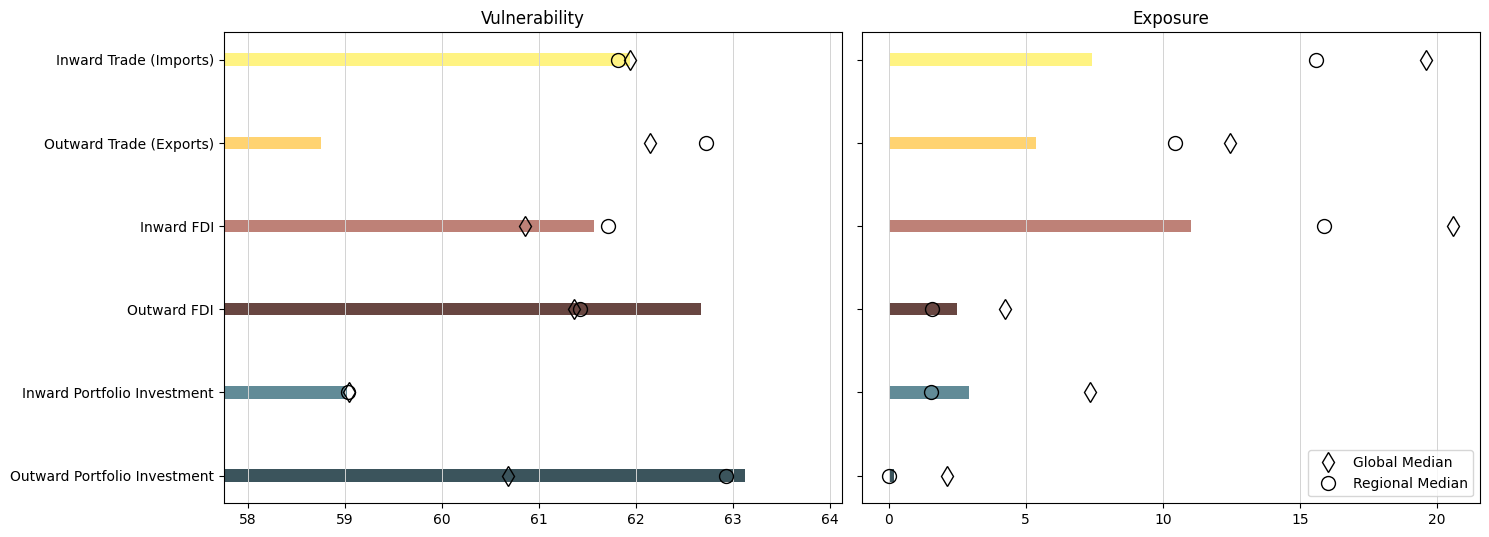

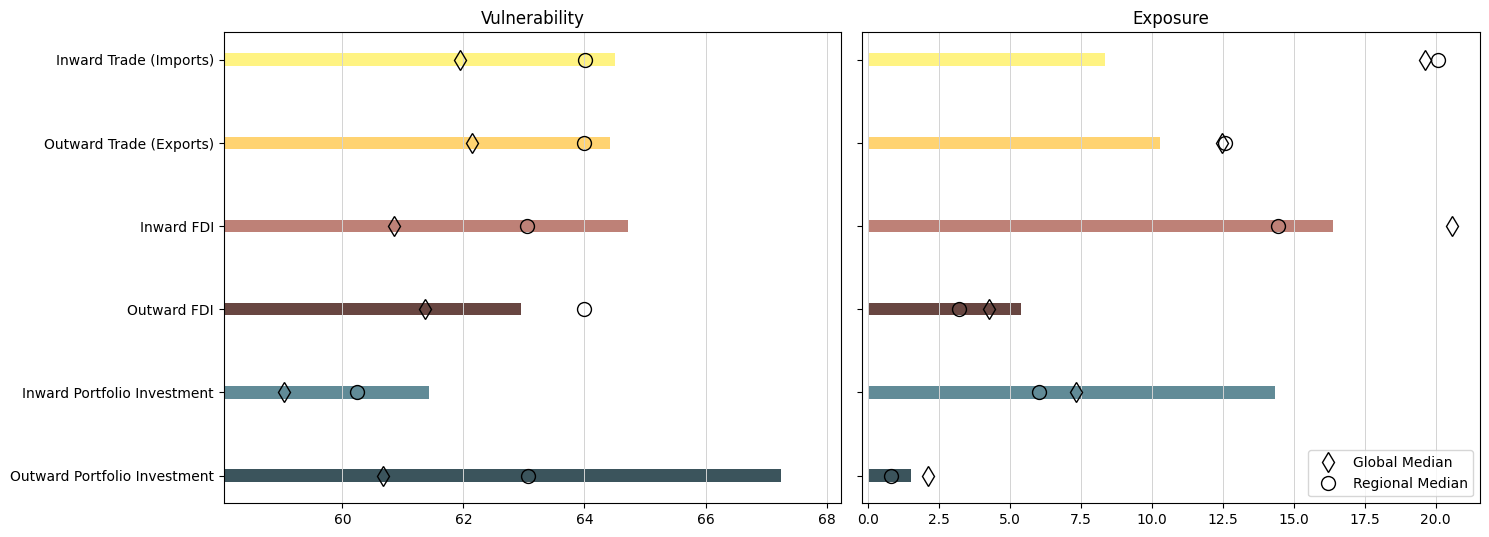

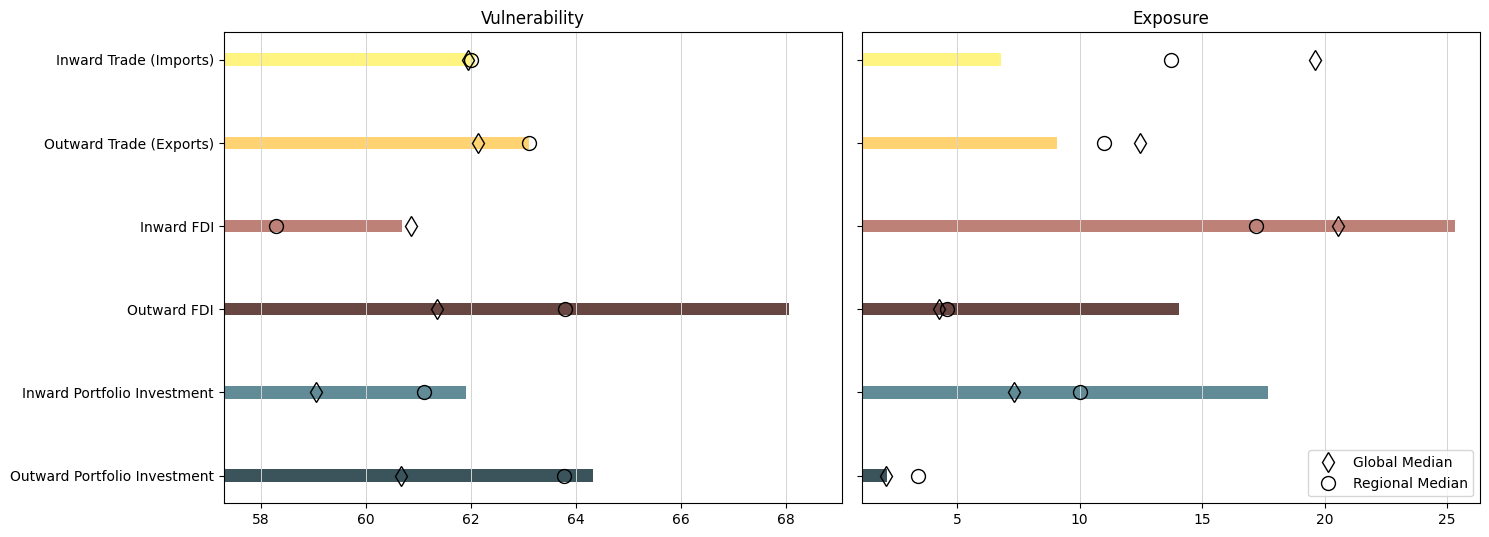

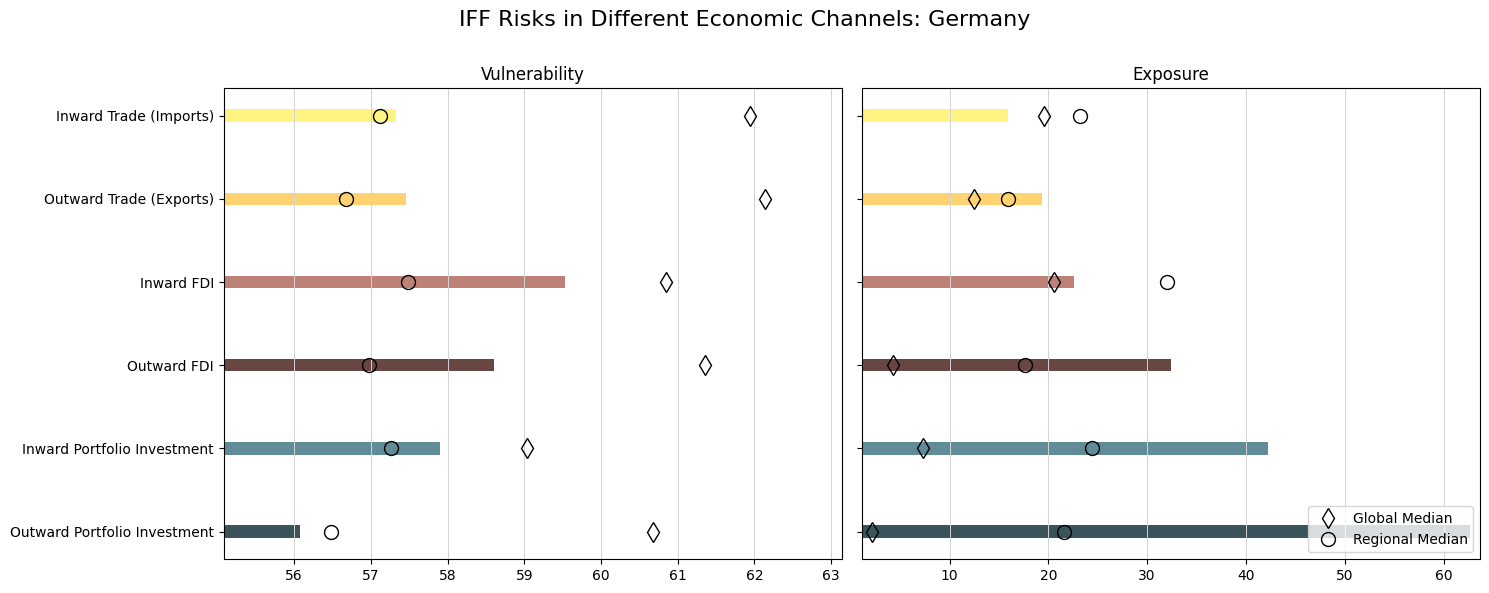

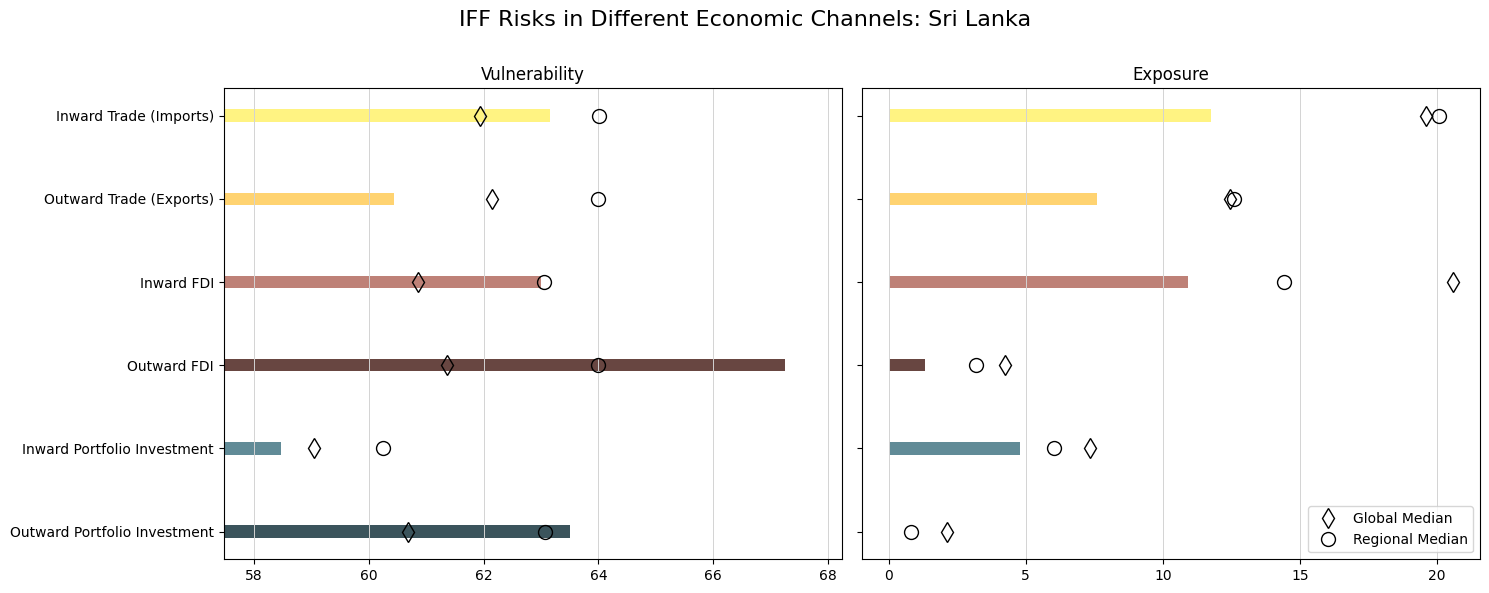

In [128]:
plot_vulnerability_exposure(country="NGA",year=2020,title=""#"IFF Risks in Different Economic Channels: Nigeria"
                            ,save_path=f"{path_figures}/vulnerability_exposure_nigeria.png")
plot_vulnerability_exposure(country="IDN",year=2020,title=""#"IFF Risks in Different Economic Channels: Indonesia"
                            ,save_path=f"{path_figures}/vulnerability_exposure_indonesia.png")
plot_vulnerability_exposure(country="BRA",year=2020,title=""#"IFF Risks in Different Economic Channels: Brazil"
                            ,save_path=f"{path_figures}/vulnerability_exposure_brazil.png")

In [129]:
def plot_vulnerability_chart_differentbars(ax, country, year, colors, threshold, channels_to_keep, legend):
    # Create a DataFrame for ordered channels
    ordered_channels_df = pd.DataFrame({'channel': channels_to_keep})
    
    # Get the data for the specified country and year, filtered by the channels to keep
    country_year = country_level[(country_level['iso3'] == country) & (country_level['year'] == year) & (country_level['channel'].isin(channels_to_keep))]

    # Merge to align with the desired channel order
    merged_data = pd.merge(ordered_channels_df, country_year, on='channel', how='left')

    # Drop NaN or Inf values
    merged_data = merged_data.replace([np.inf, -np.inf], np.nan).dropna()

    # Extract the relevant data for plotting
    channels = merged_data['channel']
    vulnerability = merged_data['vulnerability']
    intensity = merged_data['intensity']
    vulnerability_reg = merged_data['vulnerability_reg']
    vulnerability_glo = merged_data['vulnerability_glo']
    
    bar_positions = []
    bar_heights = []

    # Plot each bar individually with varying height
    for idx, channel in enumerate(channels):
        bar_height = 0.2 if intensity.iloc[idx] > threshold else 0.1
        bar_color = colors[idx % len(colors)]  # Cycle through the colors list
        bar = ax.barh(channel, vulnerability.iloc[idx], color=bar_color, height=bar_height)
        bar_positions.append(bar[0].get_y())
        bar_heights.append(bar_height)

    # Adding hollow indicators for global and regional Medians
    for idx, (pos, height) in enumerate(zip(bar_positions, bar_heights)):
        marker_y_position = pos + height / 2
        ax.plot(vulnerability_glo.iloc[idx], marker_y_position, 'd', mfc='none', mec='black', ms=10, mew=1)  # Diamond shape for global
        ax.plot(vulnerability_reg.iloc[idx], marker_y_position, 'o', mfc='none', mec='black', ms=10, mew=1)  # Circle shape for regional

    #ax.set_xlabel('Vulnerability')
    #ax.set_title('Vulnerability')
    

    # Adjust the x-axis to cover the relevant range of the data
    all_values = np.concatenate((vulnerability, vulnerability_glo, vulnerability_reg))
    ax.set_xlim([min(all_values) - 1, max(all_values) + 1])

    # Adding a light gray grid for better readability
    ax.grid(axis='x', color='lightgray', linestyle='-', linewidth=0.7)

    # Adding a legend for the indicators
    ax.legend(legend)


In [130]:
def plot_fdi(country, year, title, save_path):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))

    plot_vulnerability_chart_differentbars(ax1, country, year, threshold = 0.05, colors = ['#CF9F8E','#AD756C','#845953'], channels_to_keep=['Inward FDI: Debt','Inward FDI: Equity','Inward FDI'], legend = "")
    plot_vulnerability_chart_differentbars(ax2, country, year, threshold = 0.05, colors = ['#CF9F8E','#AD756C','#845953'], channels_to_keep=['Outward FDI: Debt','Outward FDI: Equity','Outward FDI'], legend = ['Global Median', 'Regional Median'])

    plt.tight_layout()
    fig.suptitle(title, fontsize=16)
    plt.subplots_adjust(top=0.85)
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.show()

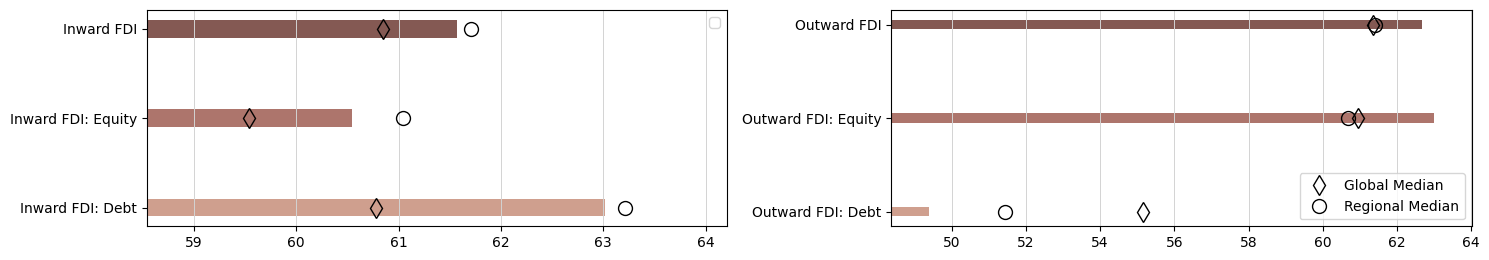

In [131]:
plot_fdi(country="NGA",year=2020,title=''#"Vulnerability to Secrecy Risk in FDI: Nigeria"
         ,save_path=f"{path_figures}/fdi_vulnerability_nigeria")

In [132]:
def plot_pi(country, year, title, save_path):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))

    plot_vulnerability_chart_differentbars(ax1, country, year, threshold = 0.05, colors = ['#74a7b5', '#537782', '#374f56'], channels_to_keep=['Inward Portfolio Inv.: Debt','Inward Portfolio Inv.: Equity','Inward Portfolio Investment'], legend = "")
    plot_vulnerability_chart_differentbars(ax2, country, year, threshold = 0.05, colors = ['#74a7b5', '#537782', '#374f56'], channels_to_keep=['Outward Portfolio Inv.: Debt','Outward Portfolio Inv.: Equity','Outward Portfolio Investment'], legend = ['Global Median', 'Regional Median'])

    plt.tight_layout()
    fig.suptitle(title, fontsize=16)
    plt.subplots_adjust(top=0.85)
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.show()

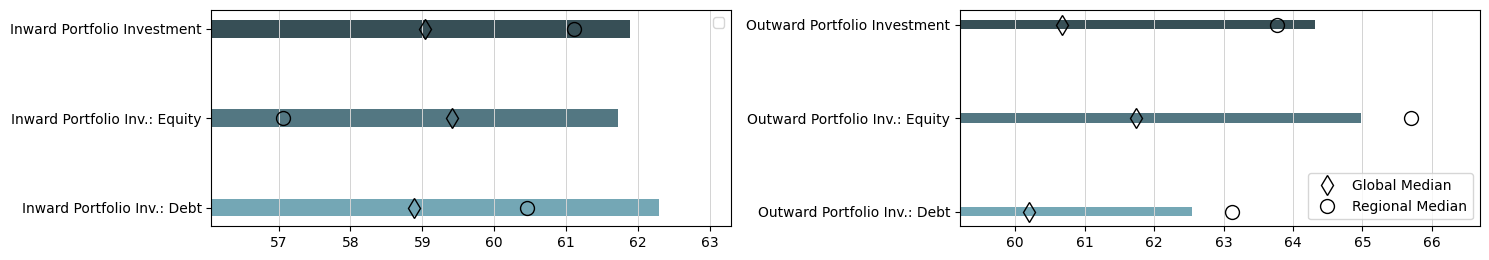

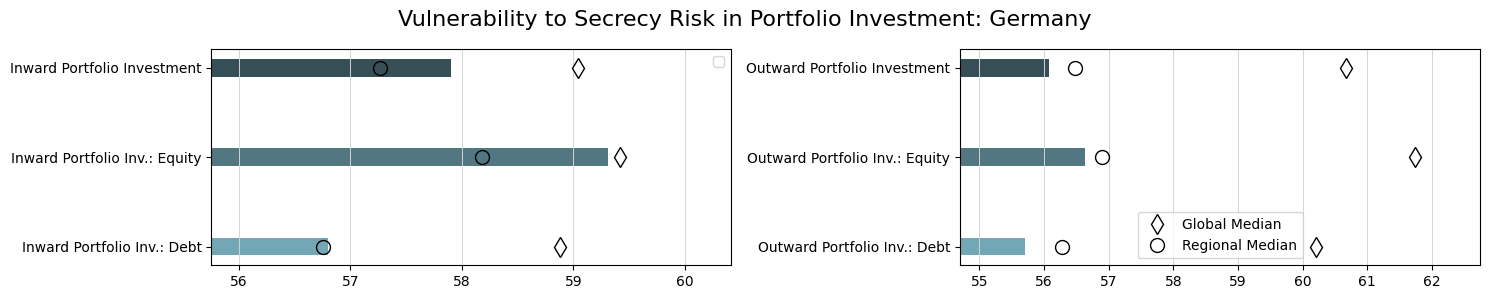

In [133]:
plot_pi(country="BRA",year=2020,title=""#"Vulnerability to Secrecy Risk in Portfolio Investment: Brazil"
        ,save_path=f"{path_figures}/pi_vulnerability_brazil")

In [134]:
def plot_trade(country, year, title, save_path):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 9))

    plot_vulnerability_chart_differentbars(ax1, country, year, threshold = 0.015, colors = ['#fff382',
                                                                         '#ffe37a', '#fff382',
                                                                         '#ffe37a', '#fff382',
                                                                         '#ffe37a', '#fff382',
                                                                         '#ffe37a', '#fff382',
                                                                         '#ffe37a'#,'#E0B35F'
                                                                         ],
                                                                         channels_to_keep= [
                                                                             "Imports: Other", "Imports: Vehicles",
                                                                             "Imports: Textiles", #"Imports: Stone",
                                                                             "Imports: Minerals","Imports: Metals",
                                                                             "Imports: Machinery", "Imports: Electronics",
                                                                             "Imports: Chemicals", "Imports: Agriculture",
                                                                             "Inward Trade (Imports)"],
                                                                             legend = "")
    plot_vulnerability_chart_differentbars(ax2, country, year, threshold = 0.015, colors = [ '#fff382',
                                                                         '#ffe37a', '#fff382',
                                                                         '#ffe37a', '#fff382',
                                                                         '#ffe37a', '#fff382',
                                                                         '#ffe37a', '#fff382',
                                                                         '#ffe37a'#, '#E0B35F'
                                                                         ],
                                                                          channels_to_keep= [
                                                                             "Exports: Other", "Exports: Vehicles",
                                                                             "Exports: Textiles", #"Exports: Stone",
                                                                             "Exports: Minerals","Exports: Metals",
                                                                             "Exports: Machinery", "Exports: Electronics",
                                                                             "Exports: Chemicals", "Exports: Agriculture",
                                                                             "Outward Trade (Exports)"],
                                                                             legend = ['Global Median', 'Regional Median'])

    plt.tight_layout()
    fig.suptitle(title, fontsize=16)
    plt.subplots_adjust(top=0.85)
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.show()

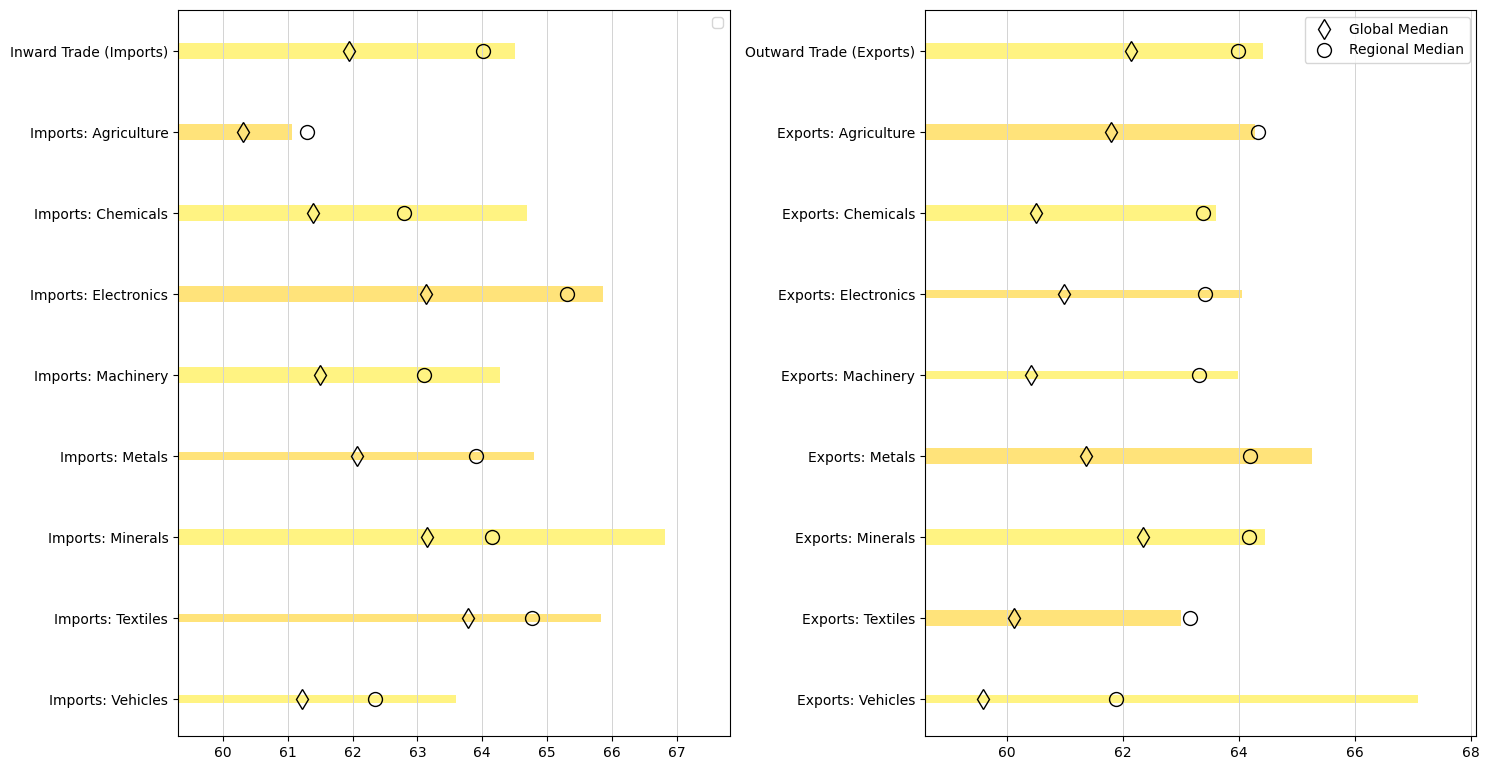

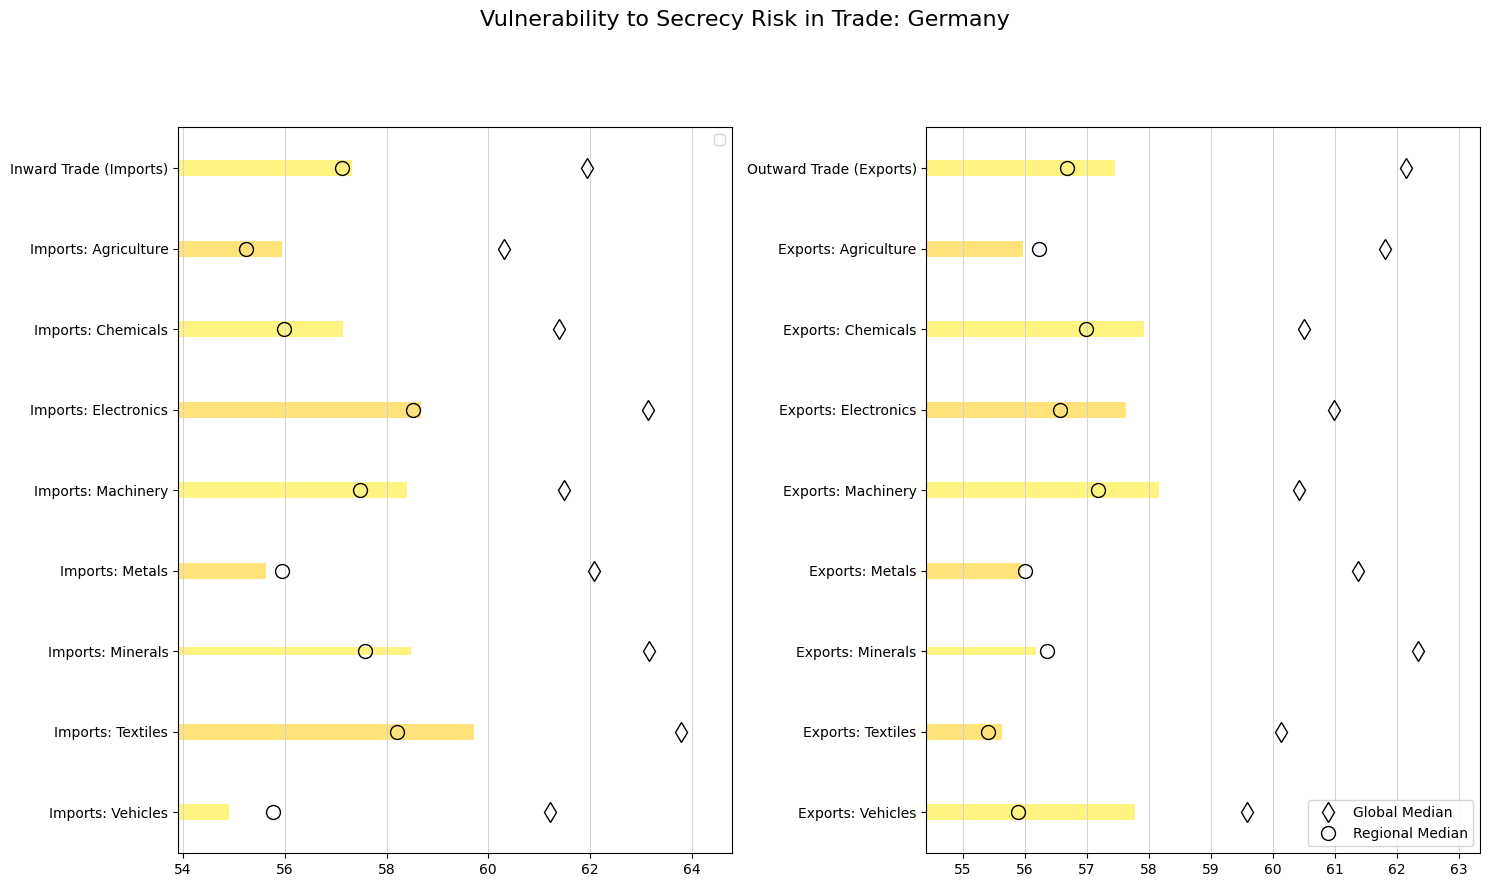

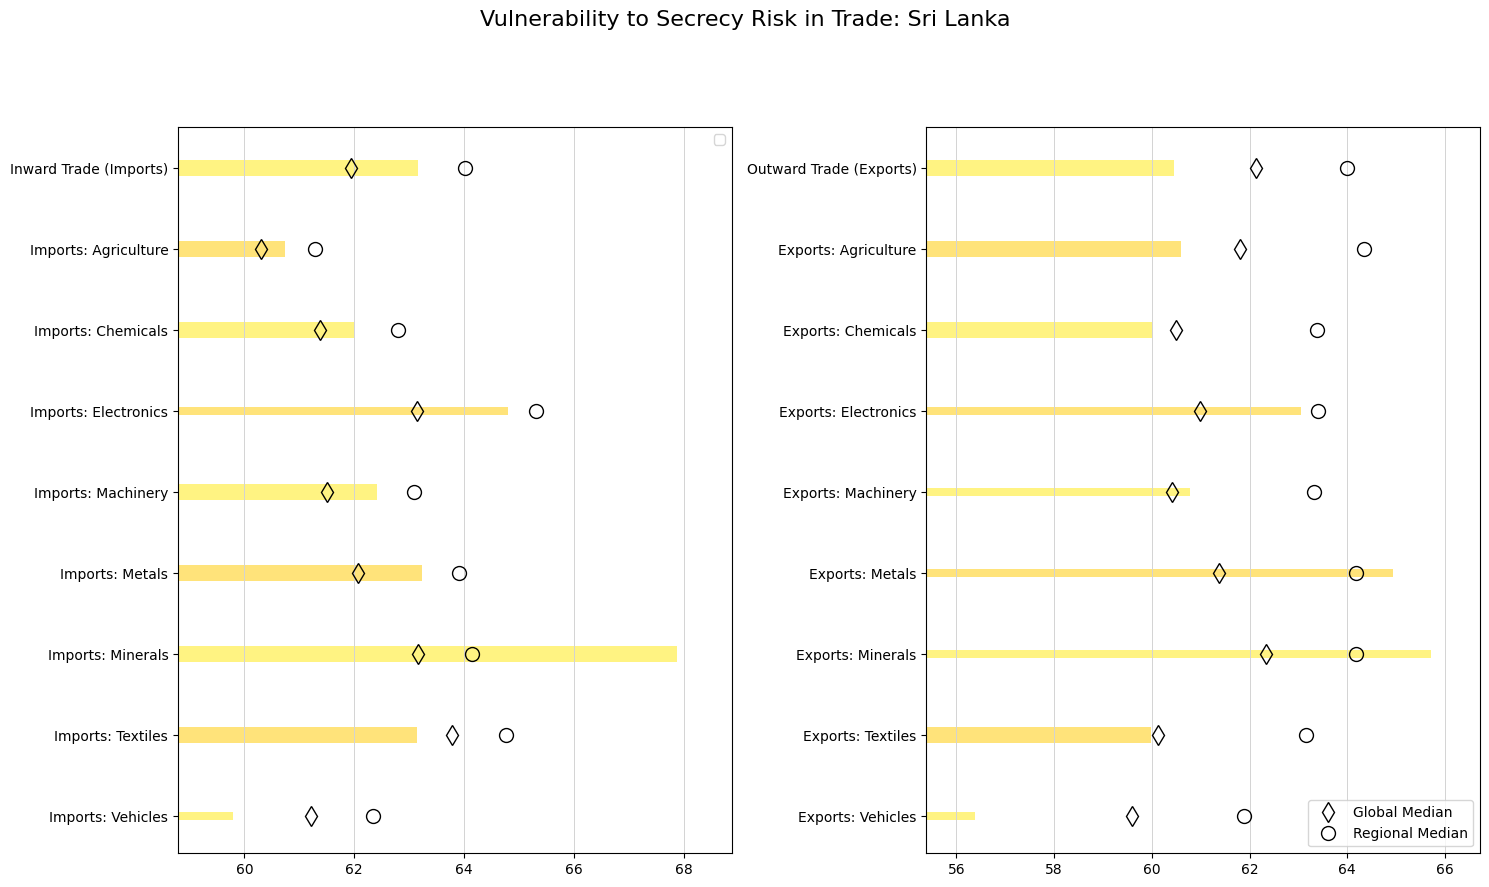

In [135]:
plot_trade(country="IDN",year=2020,title=""#"Vulnerability to Secrecy Risk in Trade: Indonesia"
           ,save_path=f"{path_figures}/trade_vulnerability_indonesia")

In [136]:
def plot_inward_fdi_components(ax, country, year, channels_to_keep):
    country_year = country_level[(country_level['iso3'] == country) & (country_level['year'] == year) & (country_level['channel'].isin(channels_to_keep))]
    fdi_data = country_year.set_index('channel')['value_busd']

    # Extracting the FDI components
    fdi_total = fdi_data.get('Inward FDI', 0)
    fdi_debt = fdi_data.get('Inward FDI: Debt', 0)
    fdi_equity = fdi_data.get('Inward FDI: Equity', 0)
    fdi_remaining = fdi_total - (fdi_debt + fdi_equity)

    bar_height = 0.00001  # Decrease this value to make the bars thinner

    ax.barh('FDI', fdi_debt, height=bar_height, color='#CF9F8E', label='Inward FDI: Debt')
    ax.barh('FDI', fdi_equity, height=bar_height, left=fdi_debt, color='#AD756C', label='Inward FDI: Equity')
    if fdi_remaining > 0:
        ax.barh('FDI', fdi_remaining, height=bar_height, left=fdi_debt + fdi_equity, color='lightgrey', label='Unclear')


    # Adding data labels with "bn US$"
    ax.set_yticks([])
    ax.text(fdi_debt/2, 0, f'{fdi_debt:.1f} bn US$', ha='center', va='center')
    ax.text(fdi_debt + fdi_equity/2, 0, f'{fdi_equity:.1f} bn US$', ha='center', va='center')
    #if fdi_remaining > 0:
    #    ax.text(fdi_debt + fdi_equity + fdi_remaining/2, 0, f'{fdi_remaining:.1f} bn US$', ha='center', va='center')

    # Set labels and titles as needed
    ax.set_xlabel('USD Billion')
    ax.set_title('Inward FDI: Debt and Equity')
    ax.legend()


In [137]:
def plot_outward_fdi_components(ax, country, year, channels_to_keep):
    country_year = country_level[(country_level['iso3'] == country) & (country_level['year'] == year) & (country_level['channel'].isin(channels_to_keep))]
    fdi_data = country_year.set_index('channel')['value_busd']

    # Extracting the FDI components
    fdi_total = fdi_data.get('Outward FDI', 0)
    fdi_debt = fdi_data.get('Outward FDI: Debt', 0)
    fdi_equity = fdi_data.get('Outward FDI: Equity', 0)
    fdi_remaining = fdi_total - (fdi_debt + fdi_equity)

    bar_height = 0.00001  # Decrease this value to make the bars thinner

    ax.barh('FDI', fdi_debt, height=bar_height, color='#CF9F8E', label='Outward FDI: Debt')
    ax.barh('FDI', fdi_equity, height=bar_height, left=fdi_debt, color='#AD756C', label='Outward FDI: Equity')
    if fdi_remaining > 0:
        ax.barh('FDI', fdi_remaining, height=bar_height, left=fdi_debt + fdi_equity, color='lightgrey', label='Unclear')


    # Adding data labels with "bn US$"
    ax.set_yticks([])
    ax.text(fdi_debt/2, 0, f'{fdi_debt:.1f} bn US$', ha='center', va='center')
    ax.text(fdi_debt + fdi_equity/2, 0, f'{fdi_equity:.1f} bn US$', ha='center', va='center')
    #if fdi_remaining > 0:
    #    ax.text(fdi_debt + fdi_equity + fdi_remaining/2, 0, f'{fdi_remaining:.1f} bn US$', ha='center', va='center')

    # Set labels and titles as needed
    ax.set_xlabel('USD Billion')
    ax.set_title('Outward FDI: Debt and Equity')
    ax.legend()


In [138]:
def plot_fdi_components(country, year, title, save_path):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))

    plot_inward_fdi_components(ax1, country, year, channels_to_keep=['Inward FDI','Inward FDI: Debt','Inward FDI: Equity'])
    plot_outward_fdi_components(ax2, country, year, channels_to_keep=['Outward FDI','Outward FDI: Debt','Outward FDI: Equity'])

    plt.tight_layout()
    fig.suptitle(title, fontsize=16)
    plt.subplots_adjust(top=0.85)
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.show()

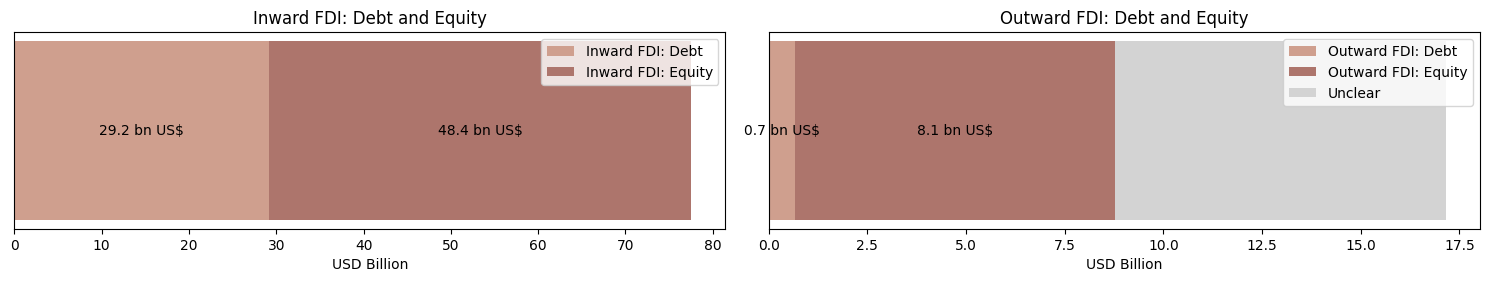

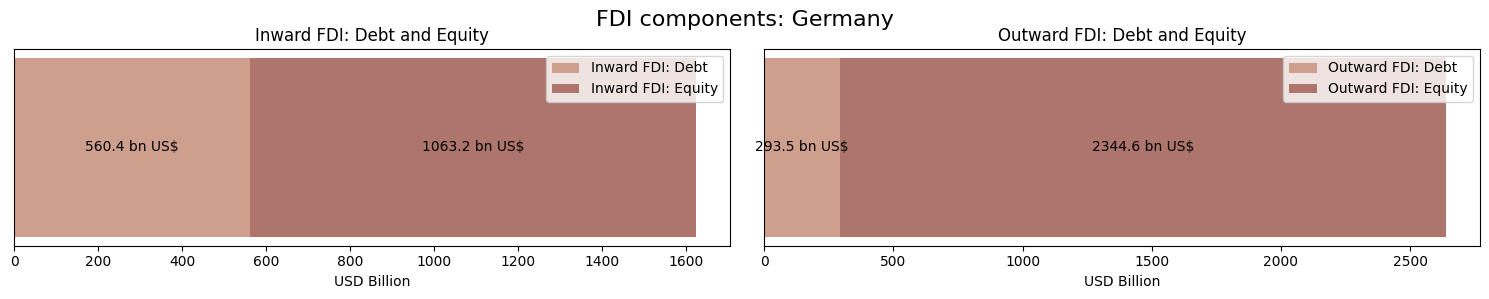

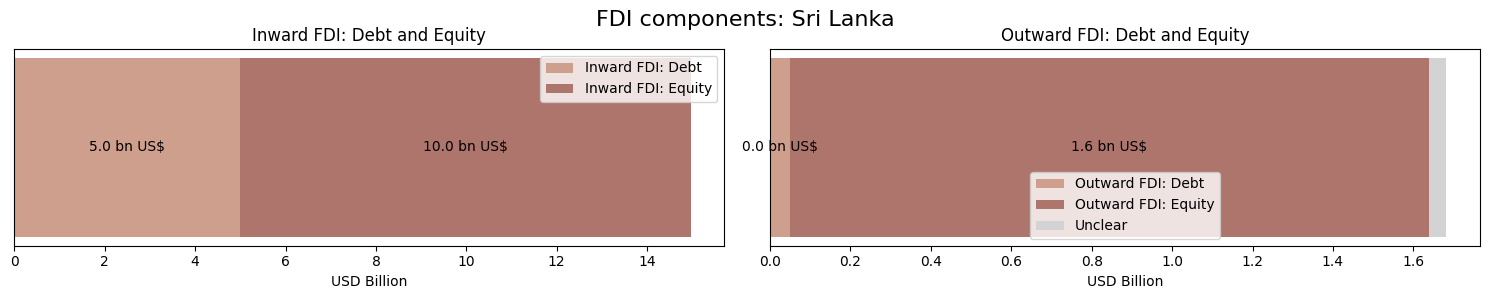

In [139]:
plot_fdi_components(country="NGA", year=2020,title="",
                    save_path=f"{path_figures}/fdi_components_nigeria.png")

In [140]:
def plot_inward_pi_components(ax, country, year, channels_to_keep):
    country_year = country_level[(country_level['iso3'] == country) & (country_level['year'] == year) & (country_level['channel'].isin(channels_to_keep))]
    pi_data = country_year.set_index('channel')['value_busd']

    # Extracting the FDI components
    pi_total = pi_data.get('Inward Portfolio Investment', 0)
    pi_debt = pi_data.get('Inward Portfolio Inv.: Debt', 0)
    pi_equity = pi_data.get('Inward Portfolio Inv.: Equity', 0)
    pi_remaining = pi_total - (pi_debt + pi_equity)

    bar_height = 0.00001  # Decrease this value to make the bars thinner

    ax.barh('Portfolio Investment', pi_debt, height=bar_height, color='#74a7b5', label='Inward Portfolio Inv.: Debt')
    ax.barh('Portfolio Investment', pi_equity, height=bar_height, left=pi_debt, color='#537782', label='Inward Portfolio Inv.: Equity')
    if pi_remaining > 0:
        ax.barh('Portfolio Investment', pi_remaining, height=bar_height, left=pi_debt + pi_equity, color='lightgrey', label='Unclear')


    # Adding data labels with "bn US$"
    ax.set_yticks([])
    ax.text(pi_debt/2, 0, f'{pi_debt:.1f} bn US$', ha='center', va='center')
    ax.text(pi_debt + pi_equity/2, 0, f'{pi_equity:.1f} bn US$', ha='center', va='center')
    #if pi_remaining > 0:
    #    ax.text(pi_debt + pi_equity + pi_remaining/2, 0, f'{pi_remaining:.1f} bn US$', ha='center', va='center')

    # Set labels and titles as needed
    ax.set_xlabel('USD Billion')
    ax.set_title('Inward Portfolio Investment: Debt and Equity')
    ax.legend()


In [141]:
def plot_outward_pi_components(ax, country, year, channels_to_keep):
    country_year = country_level[(country_level['iso3'] == country) & (country_level['year'] == year) & (country_level['channel'].isin(channels_to_keep))]
    pi_data = country_year.set_index('channel')['value_busd']

    # Extracting the FDI components
    pi_total = pi_data.get('Outward Portfolio Investment', 0)
    pi_debt = pi_data.get('Outward Portfolio Inv.: Debt', 0)
    pi_equity = pi_data.get('Outward Portfolio Inv.: Equity', 0)
    pi_remaining = pi_total - (pi_debt + pi_equity)

    bar_height = 0.00001  # Decrease this value to make the bars thinner

    ax.barh('Portfolio Investment', pi_debt, height=bar_height, color='#74a7b5', label='Outward Portfolio Inv.: Debt')
    ax.barh('Portfolio Investment', pi_equity, height=bar_height, left=pi_debt, color='#537782', label='Outward Portfolio Inv.: Equity')
    if pi_remaining > 0:
        ax.barh('Portfolio Investment', pi_remaining, height=bar_height, left=pi_debt + pi_equity, color='lightgrey', label='Unclear')


    # Adding data labels with "bn US$"
    ax.set_yticks([])
    ax.text(pi_debt/2, 0, f'{pi_debt:.1f} bn US$', ha='center', va='center')
    ax.text(pi_debt + pi_equity/2, 0, f'{pi_equity:.1f} bn US$', ha='center', va='center')
    #if pi_remaining > 0:
    #    ax.text(pi_debt + pi_equity + pi_remaining/2, 0, f'{pi_remaining:.1f} bn US$', ha='center', va='center')

    # Set labels and titles as needed
    ax.set_xlabel('USD Billion')
    ax.set_title('Outward Portfolio Investment: Debt and Equity')
    ax.legend()


In [142]:
def plot_pi_components(country, year, title, save_path):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))

    plot_inward_pi_components(ax1, country, year, channels_to_keep=['Inward Portfolio Investment','Inward Portfolio Inv.: Debt','Inward Portfolio Inv.: Equity'])
    plot_outward_pi_components(ax2, country, year, channels_to_keep=['Outward Portfolio Inv.','Outward Portfolio Inv.: Debt','Outward Portfolio Inv.: Equity'])

    plt.tight_layout()
    fig.suptitle(title, fontsize=16)
    plt.subplots_adjust(top=0.85)
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.show()

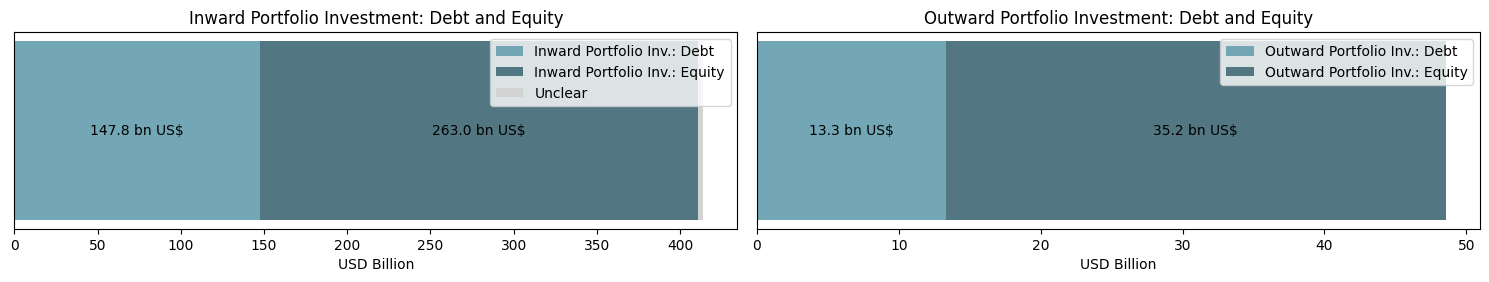

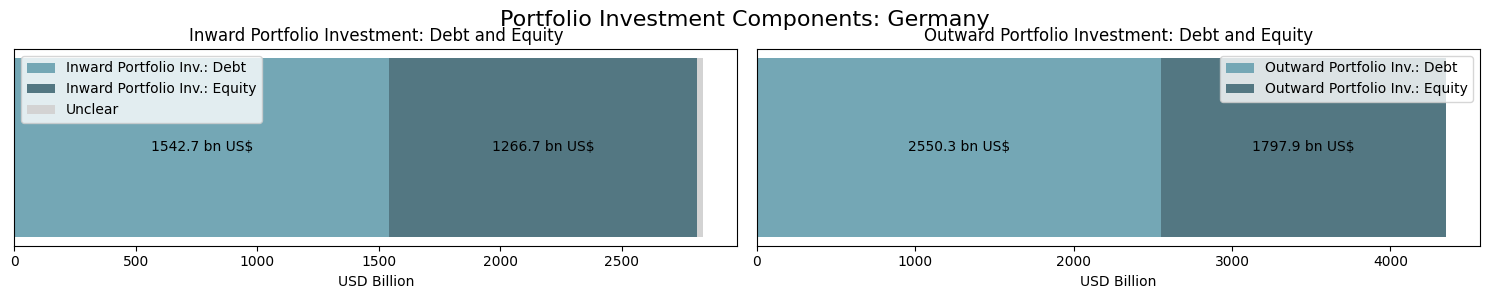

In [143]:
plot_pi_components(country="BRA", year=2020,title="",save_path=f"{path_figures}/pi_components_brazil.png")

## Contribution of different partners: Tree plots

In [144]:
def create_treemap(country, transactions, contribution, title, n_labels, n_longlabels , save_path):
    # Handle infinite and NaN values
    country_plot = country.copy()
    country_plot.replace([np.inf, -np.inf], np.nan, inplace=True)
    country_plot.dropna(subset=['fsi_2022_ss_p', contribution, transactions], inplace=True)

    # Rename 'British Virgin Islands' to 'BVI'
    country_plot['p_country_name'] = country_plot['p_country_name'].replace('British Virgin Islands', 'BVI')
    country_plot['p_country_name'] = country_plot['p_country_name'].replace('US Virgin Islands', 'UVI')
    country_plot['p_country_name'] = country_plot['p_country_name'].replace('Antigua and Barbuda', 'Antig. & Barb.')
    country_plot['p_country_name'] = country_plot['p_country_name'].replace('United Arab Emirates', 'UAE')
    country_plot['p_country_name'] = country_plot['p_country_name'].replace('Marshall Islands', 'Marshall Isl.')
    country_plot['p_country_name'] = country_plot['p_country_name'].replace('Cura�ao', 'Curacao')
    
    # Sort the data by the specified contribution column
    country_plot = country_plot.sort_values(by=contribution, ascending=False)

    # Format the specified transactions column with comma separator and add 'mUS$' prefix
    formatted_amounts = country_plot[transactions].apply(lambda x: f"m${x:,.0f}")

    # Create labels for top 10 countries with full name and amount, next 10 with iso3, and no label for the rest
    labels = [f'{c}\n{a}' for c, a in zip(country_plot['p_country_name'], formatted_amounts)][:n_longlabels]
    labels += [iso for iso in country_plot['p_iso3']][n_longlabels:n_labels]
    labels += ['' for _ in range(n_labels, len(country_plot))]

    # Text properties
    text_kwargs = {'fontsize': 8}

    # Map the 'fsi_2022_ss_p' values to their respective colors
    color_mapped = []
    for score in country_plot['fsi_2022_ss_p']:
        color_index = -1  # Default color index
        for i, (start, end, color, _) in enumerate(color_map):
            if start <= score <= end:
                color_index = i
                break
        color_mapped.append(color_map[color_index][2] if color_index != -1 else 'grey')
    
    plt.figure(figsize=(10, 6))  # For example, 12 inches wide and 6 inches tall

    # Create the treemap with the specified text properties
    squarify.plot(sizes=country_plot[contribution], color=color_mapped, label=labels, alpha=0.9, text_kwargs=text_kwargs, 
                  linewidth=0.5, edgecolor='white')  # Set edgecolor to 'white' or 'black'

    # Set title, remove axis, save and show the plot
    plt.title(title)
    plt.axis('off')
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.show()

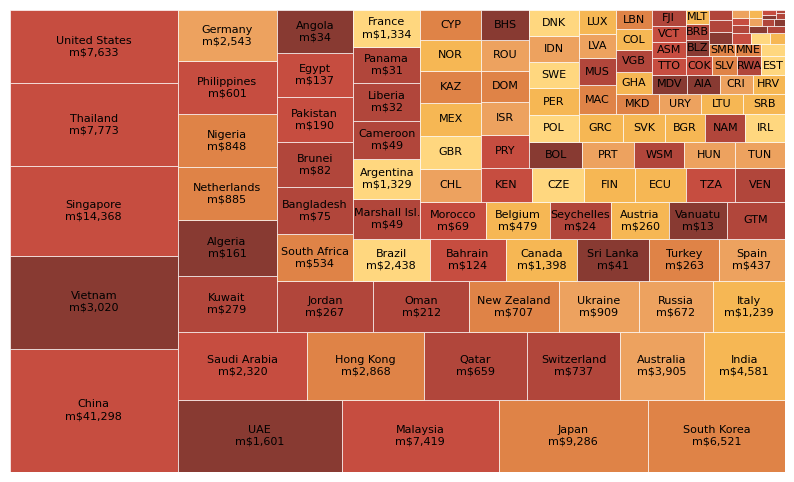

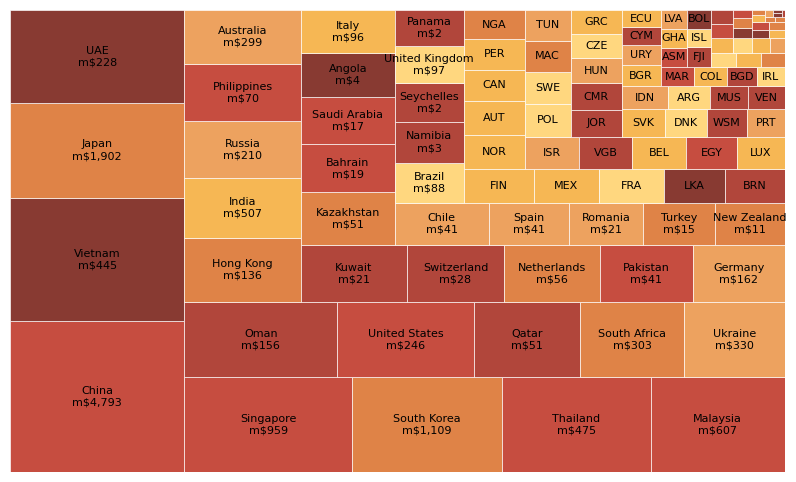

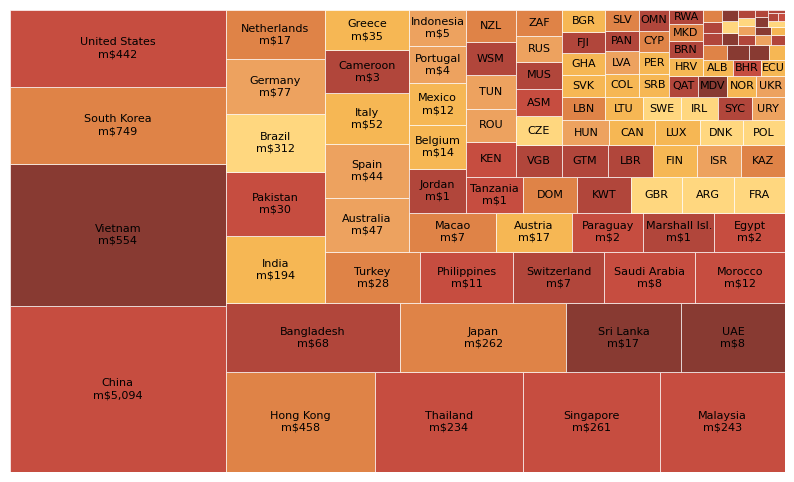

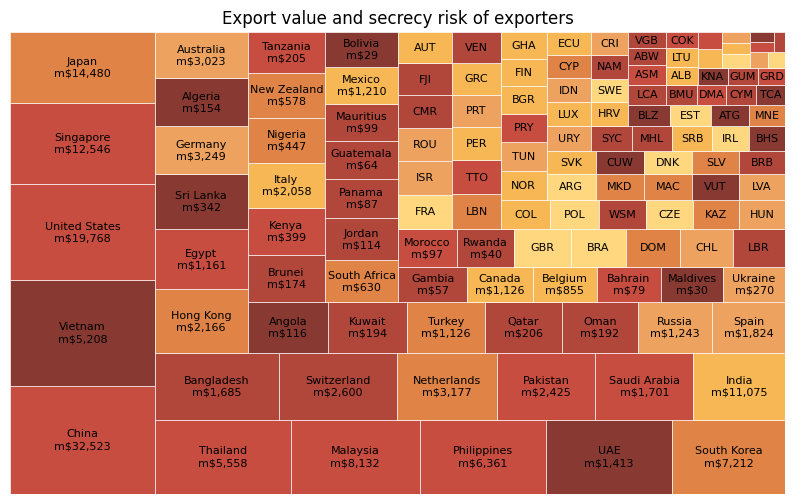

In [145]:
create_treemap(indonesia, 'imports_tot', 'contr_ss_imports_tot', ''#"Import value and secrecy risk of importers"
               ,112,50, f"{path_figures}/treemap_imports_total_indonesia.png")
create_treemap(indonesia, 'imports_metals', 'contr_ss_imports_metals', ''#"Import value and secrecy risk of importers"
               ,84,38, f"{path_figures}/treemap_imports_metals_indonesia.png")
create_treemap(indonesia, 'imports_textil', 'contr_ss_imports_textil', ''#"Import value and secrecy risk of importers"
               ,93,38, f"{path_figures}/treemap_imports_textiles_indonesia.png")
create_treemap(indonesia, 'exports_tot', 'contr_ss_exports_tot', "Export value and secrecy risk of exporters",121,50, f"{path_figures}/treemap_exports_total_indonesia.png")

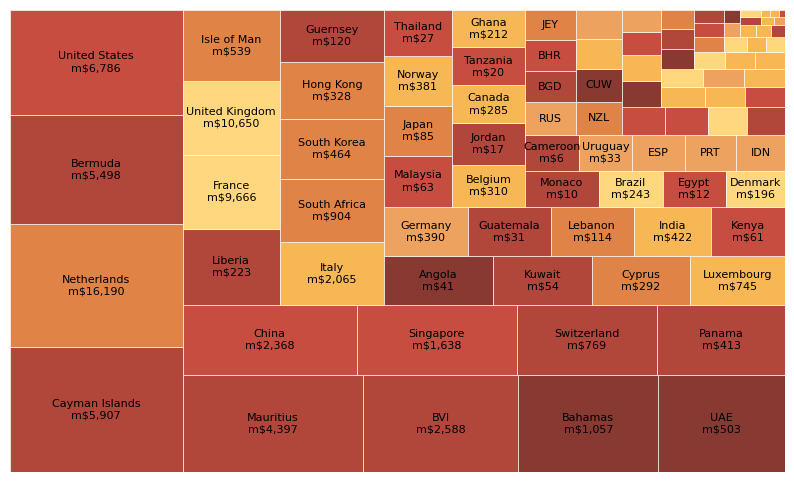

In [146]:
create_treemap(nigeria, 'fdi_inward', 'contr_ss_fdi_inward', "" ,54,45, f"{path_figures}/treemap_fdi_inward_nigeria.png")

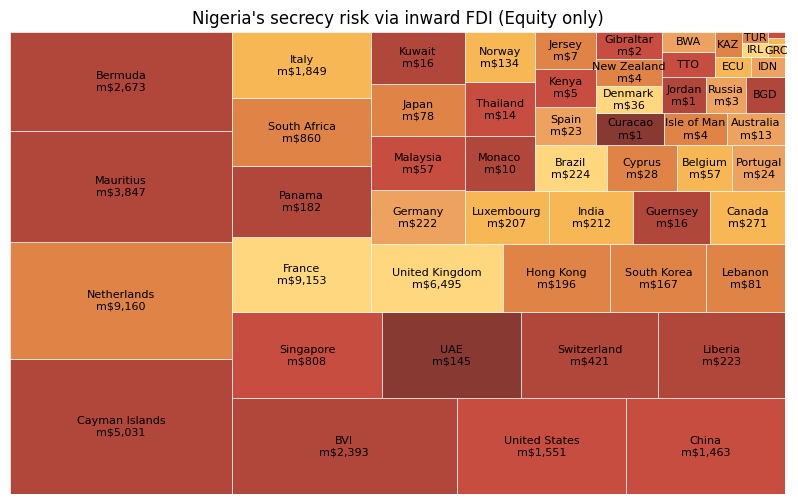

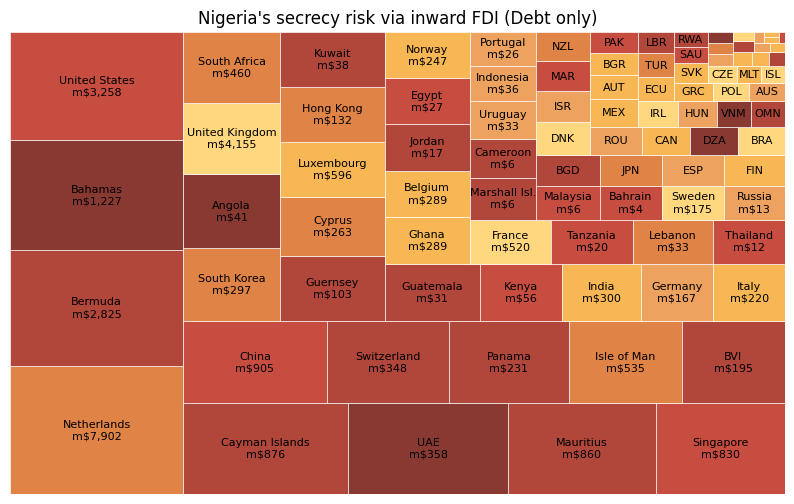

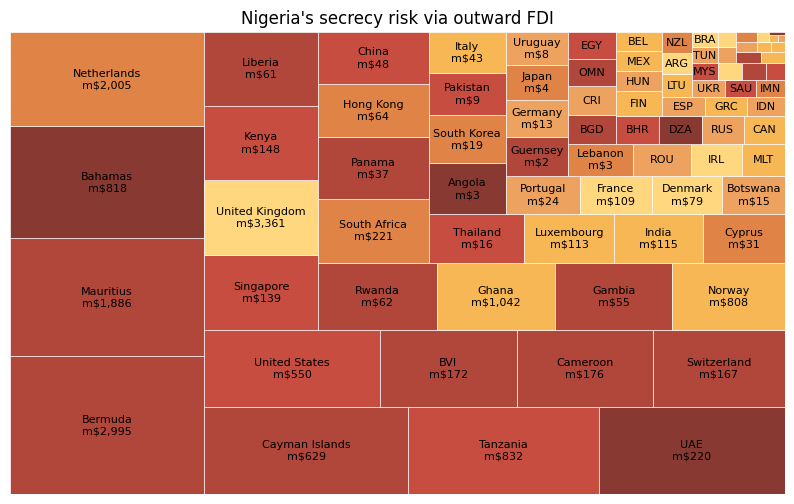

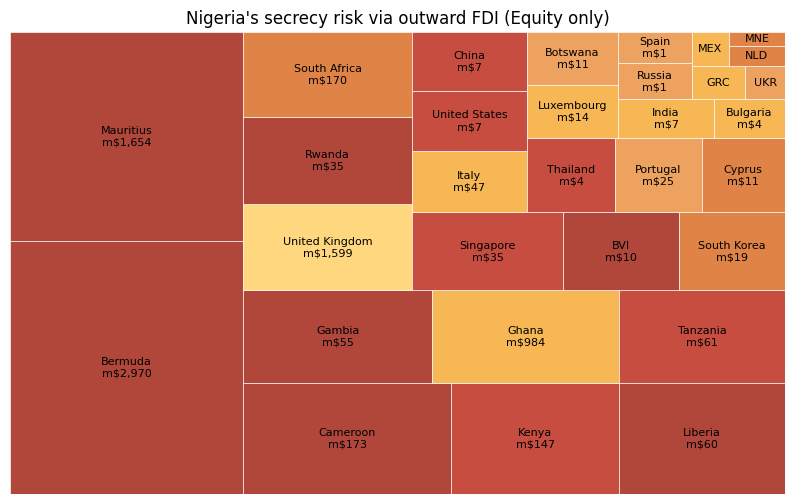

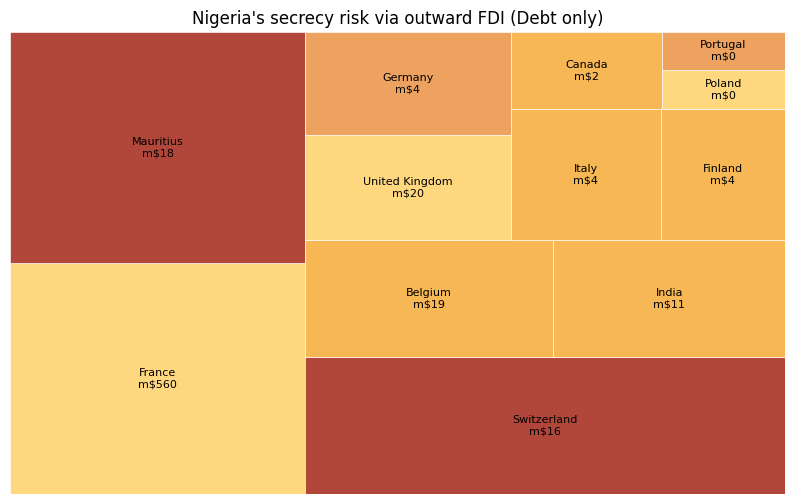

In [147]:
create_treemap(nigeria, 'fdi_eq_inward', 'contr_ss_fdi_eq_inward', "Nigeria's secrecy risk via inward FDI (Equity only)" ,54,45, f"{path_figures}/treemap_fdi_eq_inward_nigeria.png")
create_treemap(nigeria, 'fdi_debt_inward', 'contr_ss_fdi_debt_inward', "Nigeria's secrecy risk via inward FDI (Debt only)",77,45, f"{path_figures}/treemap_fdi_debt_inward_nigeria.png")
create_treemap(nigeria, 'fdi_outward', 'contr_ss_fdi_outward', "Nigeria's secrecy risk via outward FDI",67,40, f"{path_figures}/treemap_fdi_outward_nigeria.png")
create_treemap(nigeria, 'fdi_eq_outward', 'contr_ss_fdi_eq_outward', "Nigeria's secrecy risk via outward FDI (Equity only)",100,26, f"{path_figures}/treemap_fdi_eq_outward_nigeria.png")
create_treemap(nigeria, 'fdi_debt_outward', 'contr_ss_fdi_debt_outward', "Nigeria's secrecy risk via outward FDI (Debt only)",100,45, f"{path_figures}/treemap_fdi_debt_outward_nigeria.png")

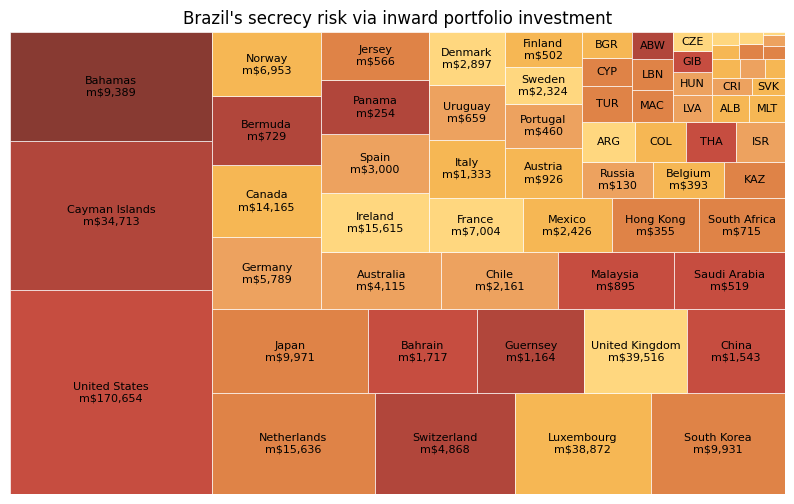

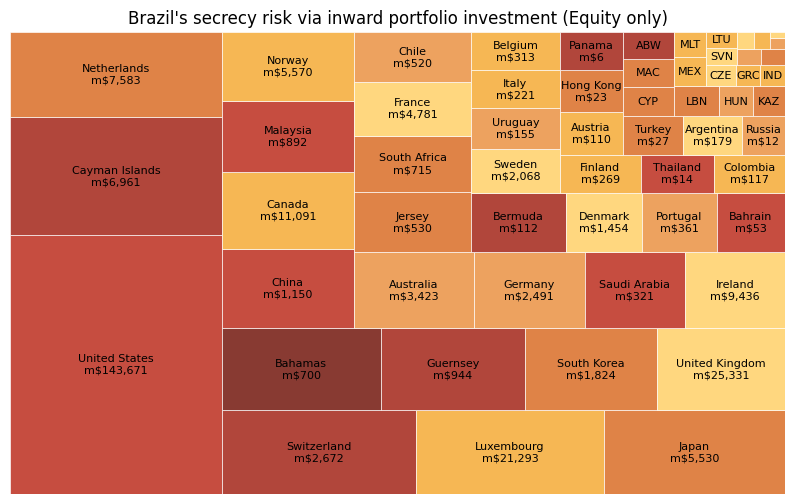

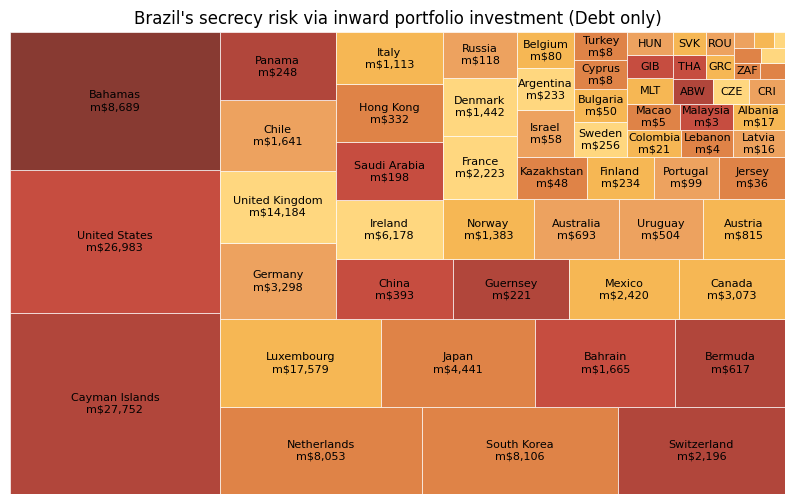

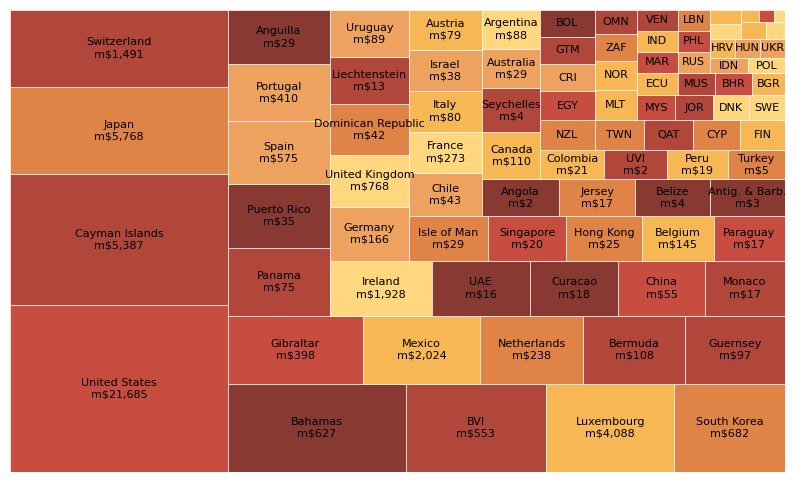

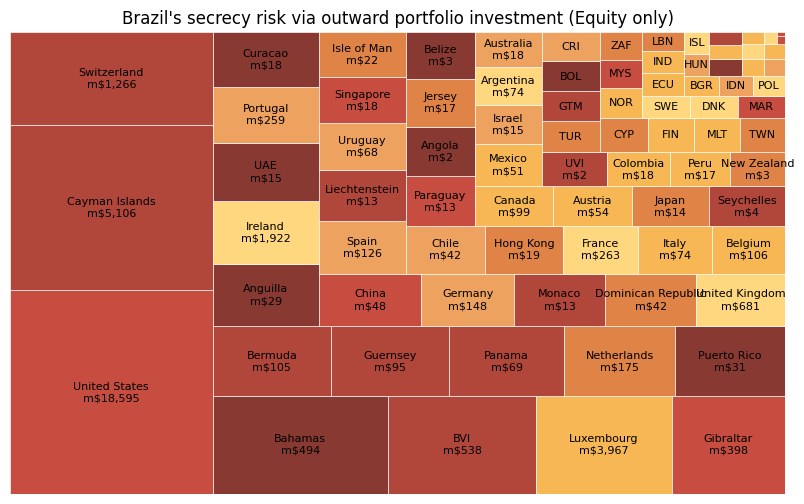

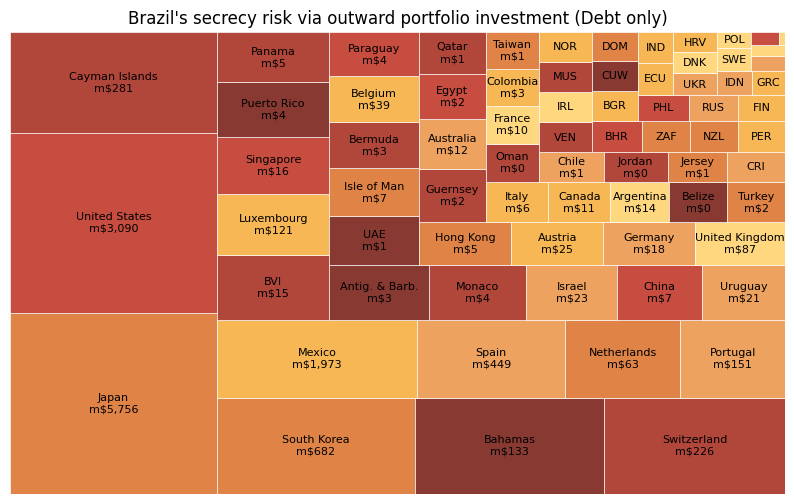

In [148]:
create_treemap(brazil, 'pi_inward', 'contr_ss_pi_inward', "Brazil's secrecy risk via inward portfolio investment", 56, 37, f"{path_figures}/treemap_pi_inward_brazil.png")
create_treemap(brazil, 'pi_eq_inward', 'contr_ss_pi_eq_inward', "Brazil's secrecy risk via inward portfolio investment (Equity only)", 52,39, f"{path_figures}/treemap_pi_eq_inward_brazil.png")
create_treemap(brazil, 'pi_debt_inward', 'contr_ss_pi_debt_inward', "Brazil's secrecy risk via inward portfolio investment (Debt only)", 57,46, f"{path_figures}/treemap_pi_debt_inward_brazil.png")
create_treemap(brazil, 'pi_outward', 'contr_ss_pi_outward', "", 82,50, f"{path_figures}/treemap_pi_outward_brazil.png")
create_treemap(brazil, 'pi_eq_outward', 'contr_ss_pi_eq_outward', "Brazil's secrecy risk via outward portfolio investment (Equity only)", 70,48, f"{path_figures}/treemap_pi_eq_outward_brazil.png")
create_treemap(brazil, 'pi_debt_outward', 'contr_ss_pi_debt_outward', "Brazil's secrecy risk via outward portfolio investment (Debt only)", 69,45, f"{path_figures}/treemap_pi_debt_outward_brazil.png")